# Analysis 2

- Compute anova beween three IA status accross all LVs
- Select LVs  with most significant difference accross status
- Draw boxplot
- Do so with both Data 1 and Data 2

## load packages 

In [1]:
library(tidyverse, warn.conflicts=FALSE)
library("ggpubr")
library(reticulate)
library(jsonlite)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching package: ‘jsonlite’


The following object is masked from ‘package:purrr’:

    flatten




## Prioritizing LVs differentially expressed accross IA progression status

### Importing RNAseq data

#### Data 1: Projecting data at individual timepoint into LV space, substract resulting projection 

In [2]:
DAISY_diff_proj_1 <- readRDS(paste0("output/gp_RNA_proj_1.rds"))
DAISY_diff_proj_2 <- readRDS(paste0("output/gp_RNA_proj_2.rds"))
## difference between the two 
Daisy_diff <- DAISY_diff_proj_1[,2:988] - DAISY_diff_proj_2[,2:988]
DAISY_LV_diff <- DAISY_diff_proj_1
DAISY_LV_diff[,2:988] <- Daisy_diff
head(DAISY_LV_diff,5)

,ID,LV1,LV2,LV3,LV4,LV5,LV6,LV7,LV8,LV9,⋯,LV979,LV980,LV981,LV982,LV983,LV984,LV985,LV986,LV987,Group
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<ord>
1,00041-0,0.11140203,-0.021818790,-0.0535675047,0.067776314,-0.004886417,-0.01349279,-0.21384901,-0.02506244,-0.02602336,⋯,0.056442779,0.031079155,0.039551201,-0.003216641,0.05876335,-0.1235162,-0.21851990,0.002038538,0.01719279,Maintainer
2,00110-0,-0.07227066,-0.031820395,-0.0017124683,0.005697077,0.001916463,0.01898339,0.20061505,0.04795546,0.01731360,⋯,-0.000887035,-0.040743388,-0.020157308,-0.009622277,-0.01772465,-0.2701976,0.03313927,0.022591122,0.06483950,Reverter
3,00139-0,-0.06975536,-0.061082676,-0.0900765329,0.150849341,-0.078259462,0.05815224,-0.03904118,0.02301079,-0.06903941,⋯,-0.034678138,-0.005332622,-0.022895423,0.014878154,-0.05049221,-0.1304244,0.21384840,0.008425512,0.06776475,Reverter
4,00159-0,-0.07806625,0.397310916,-0.0416671066,0.086283757,0.015893750,-0.03211687,0.09401872,0.02830306,-0.06440271,⋯,0.039194495,-0.006062143,0.043149383,0.048552636,-0.03130918,-0.4727951,0.32350161,-0.087352049,-0.03400709,Maintainer
5,00174-0,-0.06436926,0.005807392,-0.0002256534,0.018971156,-0.014683138,-0.02381849,-0.08329137,-0.01727677,0.00179197,⋯,0.009958269,-0.016433316,0.006428658,-0.008130357,0.04461014,0.1835539,-0.01664969,0.010559217,-0.10689044,Progressor


#### Data 2: Project difference data into LV space

In [3]:
### choose time point
#tp <- "1"
#tp <- "2" 
tp <- "diff"
DAISY_diff_proj <- readRDS(paste0("output/gp_RNA_proj_",tp,".rds"))
LV_names <- colnames(DAISY_diff_proj)[2:988]
length(LV_names)

[1] 987

### Anova between three IA progression groups using all LVs

#### Using data 1

In [6]:
res <- data.frame(matrix(nrow = 0, ncol = 6))
# compare between three groups using anova
for (i in 1:length(LV_names)){
    comp_i <- compare_means(as.formula(paste0(LV_names[i]," ~ Group")),  data = DAISY_LV_diff,
                            method = "anova")
    res <- rbind(res, comp_i)
    }
res_formated_1 <- res[,c(1,2)]
colnames(res_formated_1) <- c("LV","DAISY_anova_p.val")
res_formated_1$DAISY_anova_fdr <- p.adjust(res_formated_1$DAISY_anova_p.val, method = "BH")
#res_formated
#saveRDS(res_formated,paste0("output/anova_4-LV_",tp,".rds"))

In [9]:
sig_LV_1 <- res_formated_1[res_formated_1$DAISY_anova_p.val<0.005,]
LV_sig_names_1 <- as.vector(sig_LV_1$LV)
#hist(res_formated$DAISY_anova_p.val)
sig_LV_1

LV,DAISY_anova_p.val,DAISY_anova_fdr
<chr>,<dbl>,<dbl>
LV92,0.0027940904,0.2507061
LV230,0.0013925149,0.2413560
LV265,0.0024057262,0.2413560
LV288,0.0022786915,0.2413560
LV368,0.0021283085,0.2413560
LV474,0.0009348401,0.2413560
LV503,0.0024453498,0.2413560
LV539,0.0023080568,0.2413560
LV648,0.0019559497,0.2413560


Boxplot of LVs with most difference accross thre status

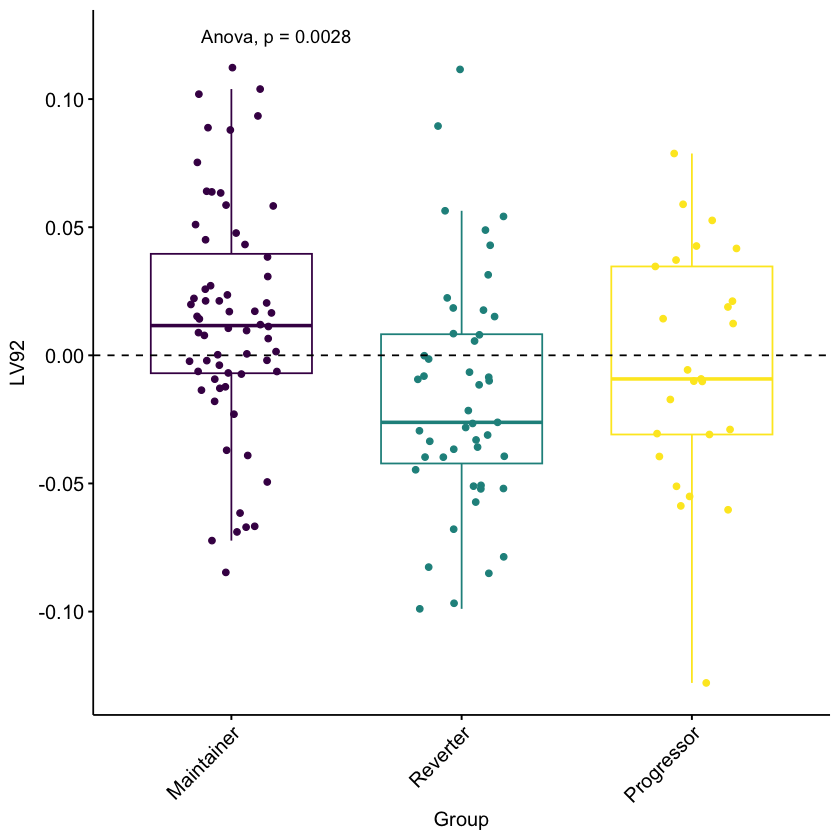

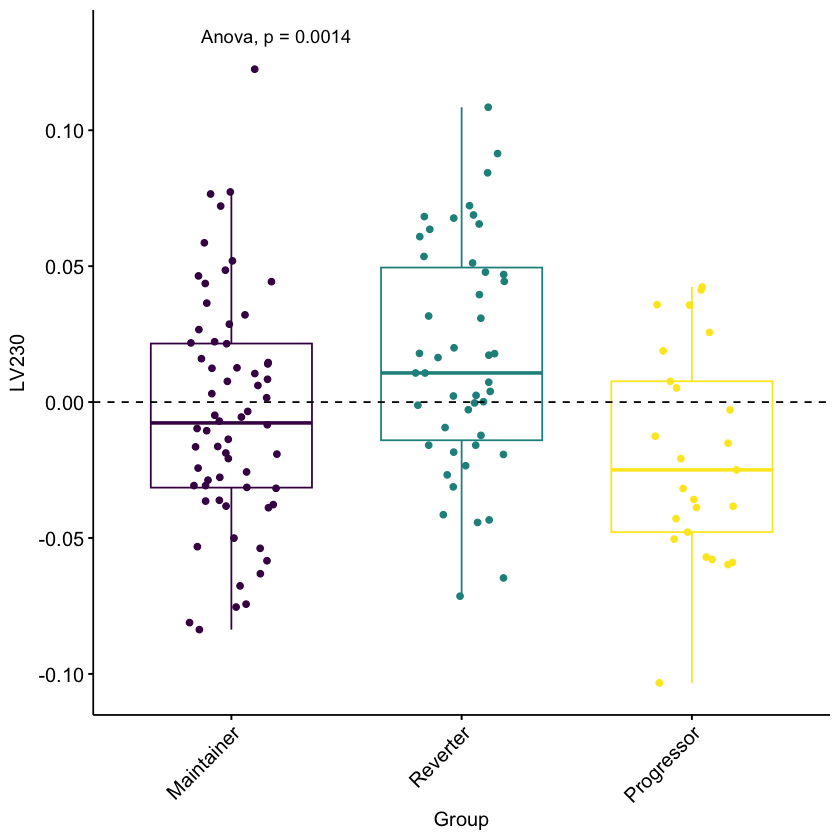

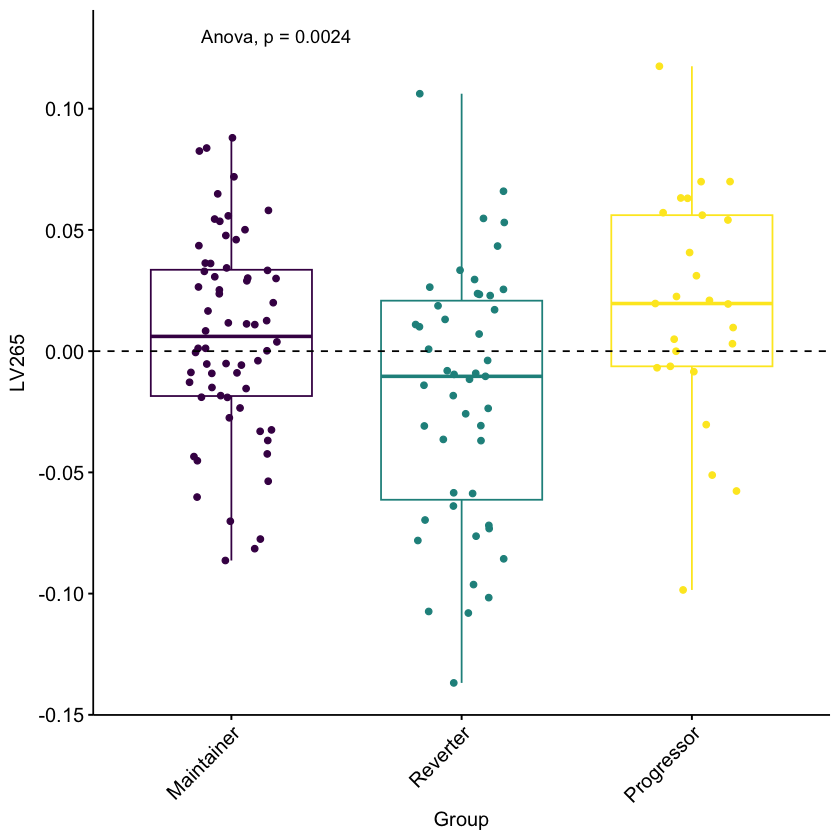

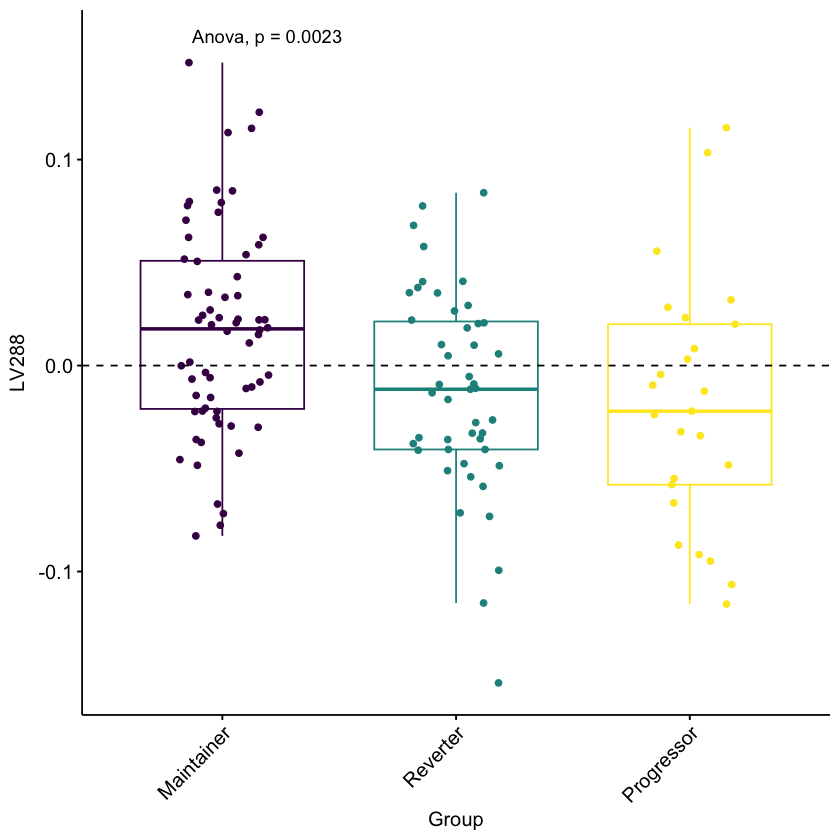

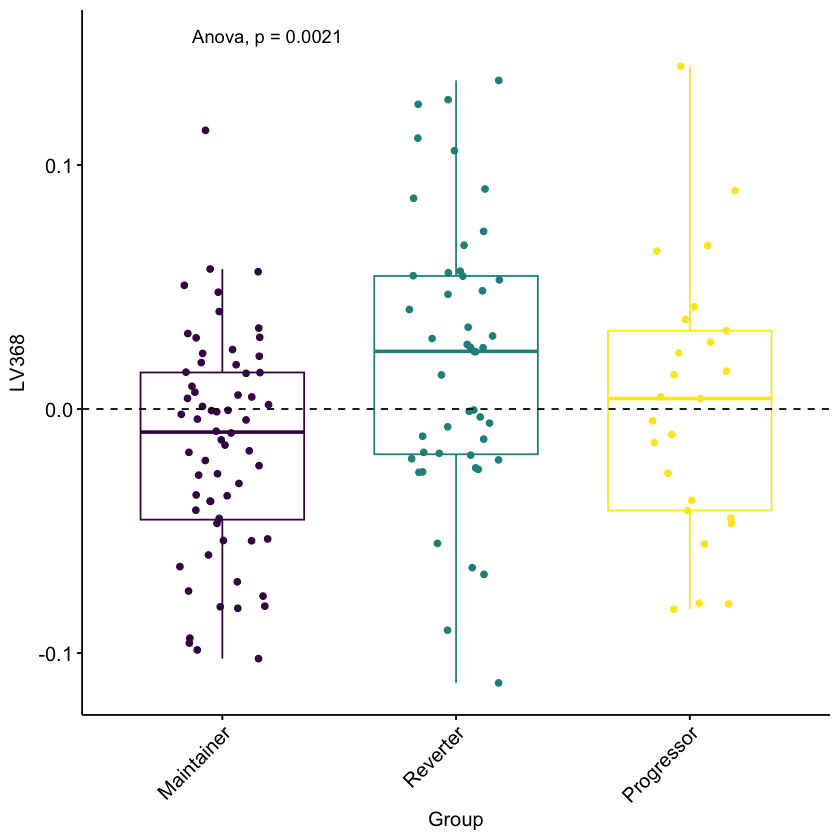

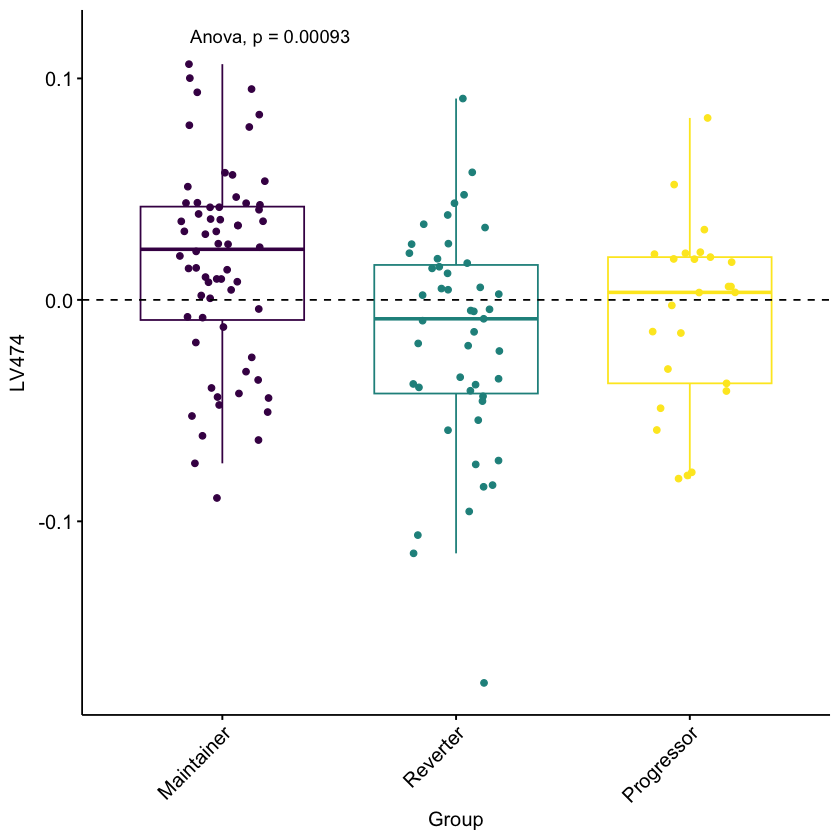

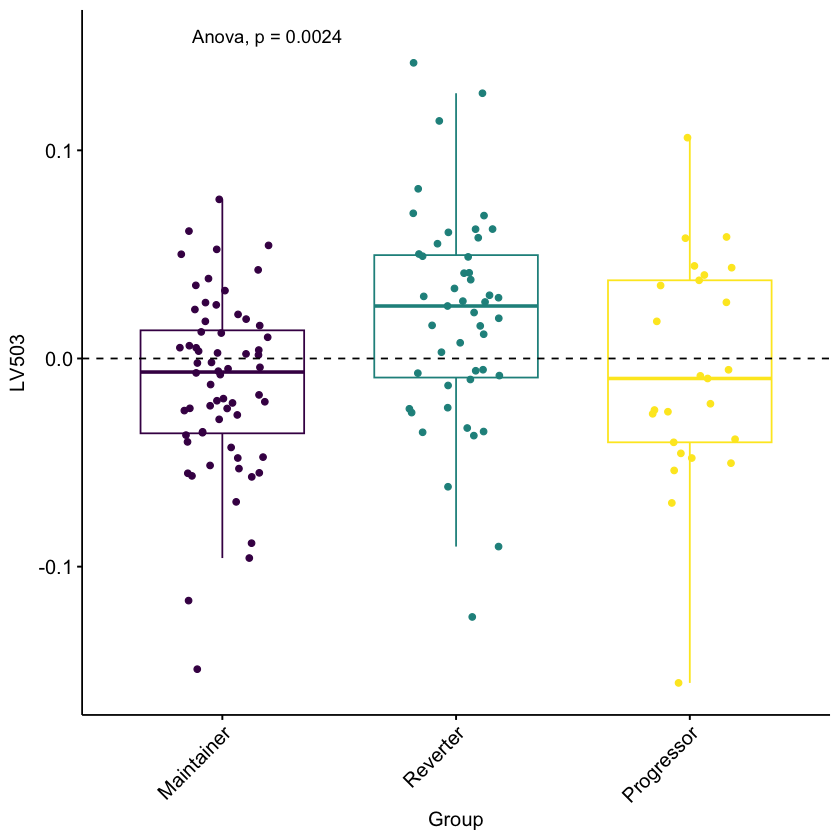

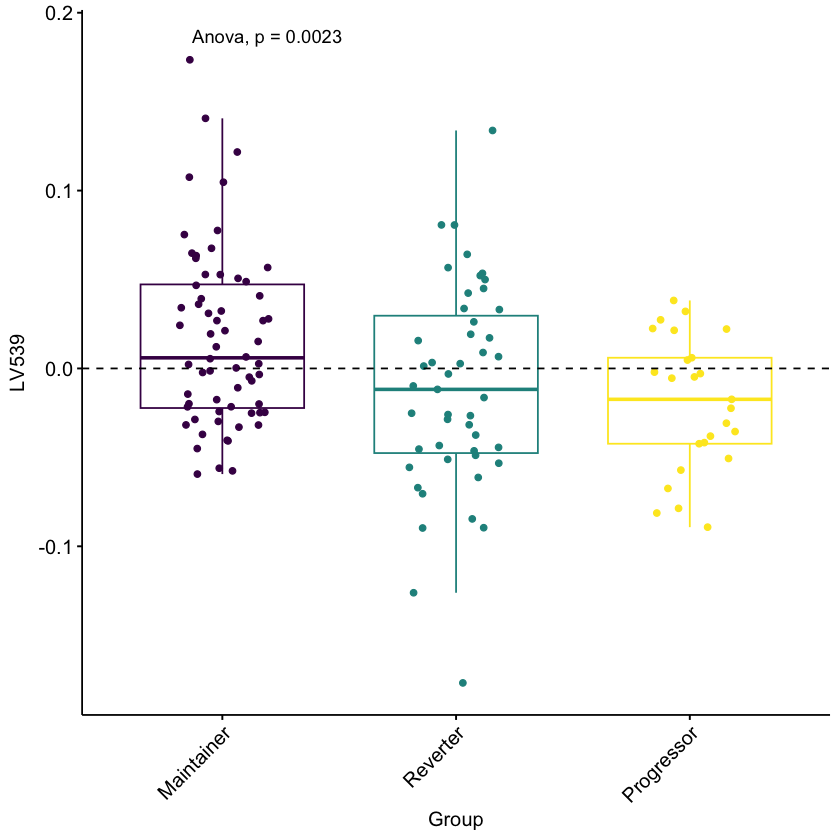

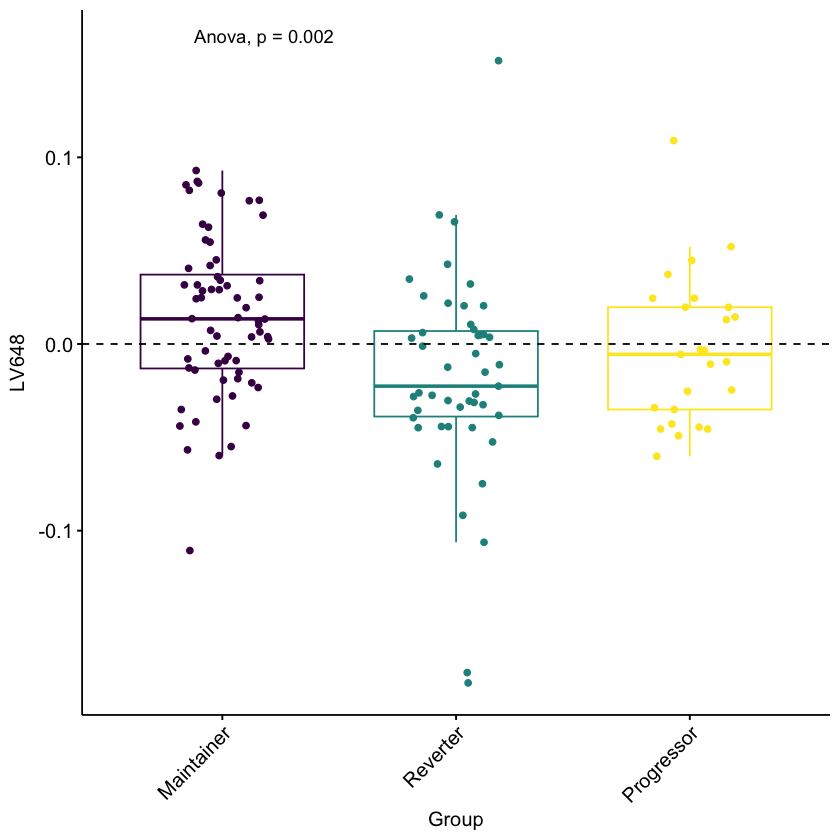

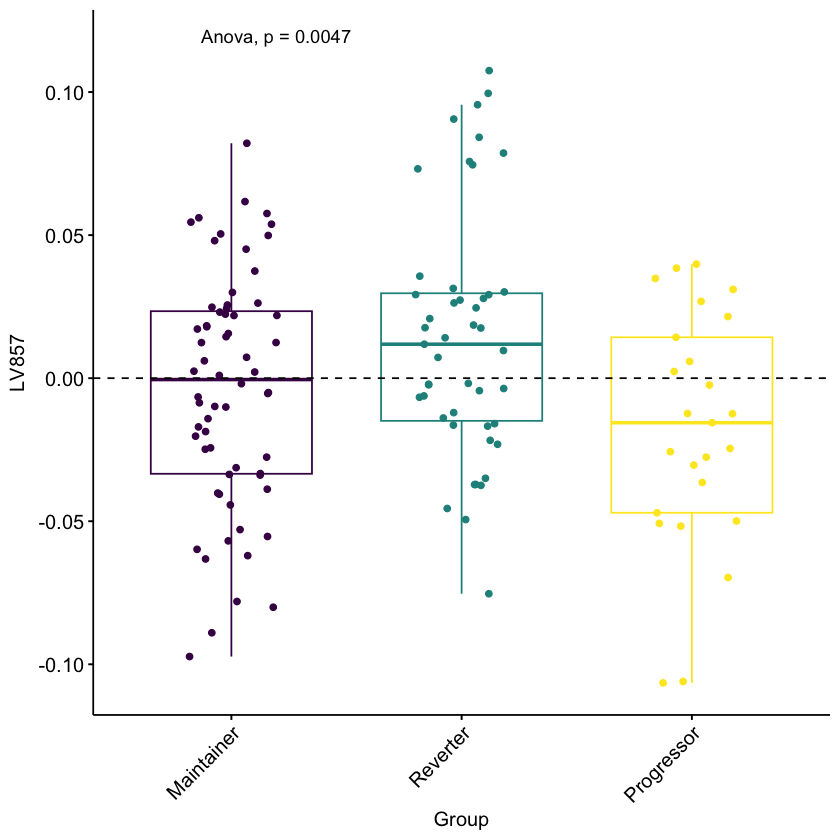

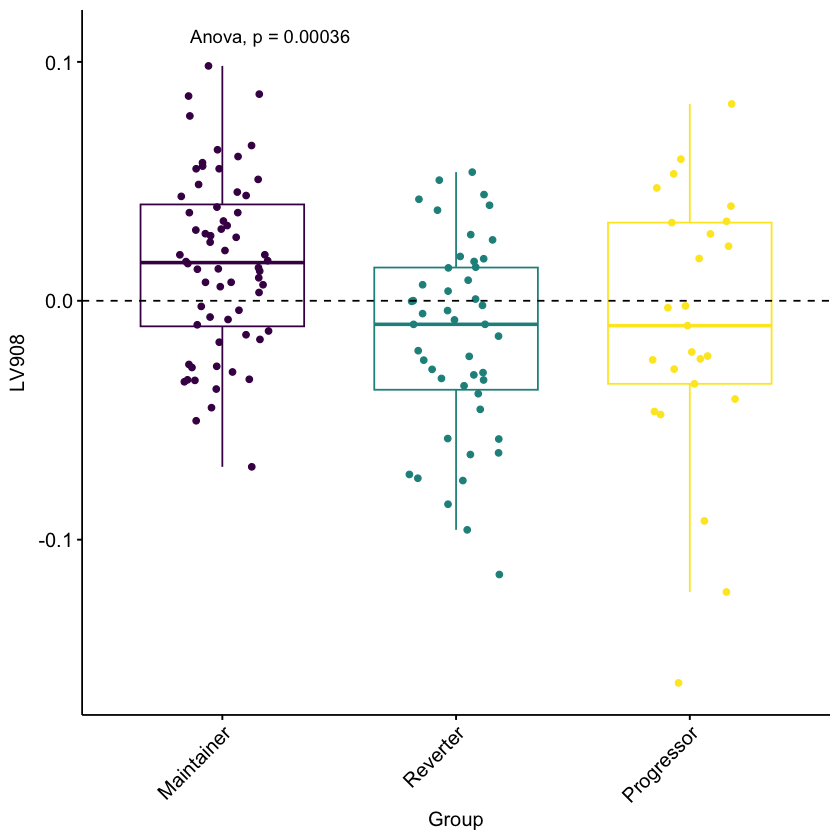

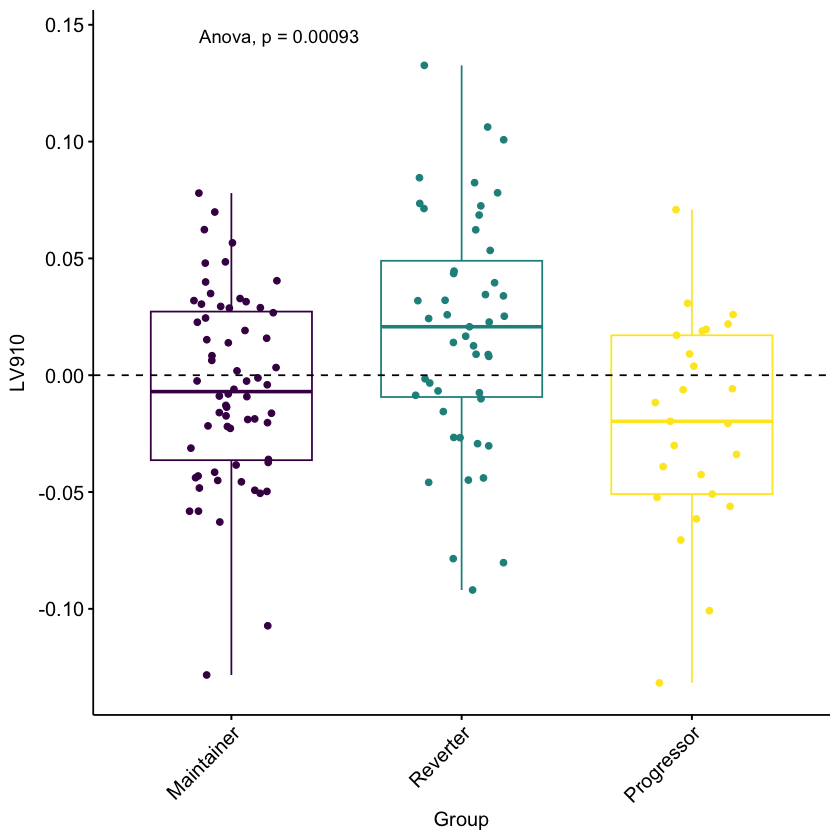

In [11]:
for (i in 1:length(LV_sig_names_1)){
    plot_i <- ggboxplot(DAISY_LV_diff, x = "Group", y = LV_sig_names_1[i], color = "Group", 
          add = "jitter", legend = "none") +
  rotate_x_text(angle = 45)+
  geom_hline(yintercept = mean(DAISY_LV_diff[,LV_sig_names_1[i]]), linetype = 2)+ # Add horizontal line at base mean
  stat_compare_means(method = "anova", label.y = max(DAISY_LV_diff[,LV_sig_names_1[i]])+ 0.01)       # Add global annova p-value 
    print(plot_i)
    
    #ggsave(paste0("LV_",T1D_LV[i],"_visit_",tp,".png"),path = paste0("figures/visit_",tp))
    } 
    #dev.off()

#### Using data 2

In [12]:
res <- data.frame(matrix(nrow = 0, ncol = 6))
# compare between three groups using anova
for (i in 1:length(LV_names)){
    comp_i <- compare_means(as.formula(paste0(LV_names[i]," ~ Group")),  data = DAISY_diff_proj,
                            method = "anova")
    res <- rbind(res, comp_i)
    }
res_formated_2 <- res[,c(1,2)]
colnames(res_formated_2) <- c("LV","DAISY_anova_p.val")
res_formated_2$DAISY_anova_fdr <- p.adjust(res_formated_2$DAISY_anova_p.val, method = "BH")
#res_formated
#saveRDS(res_formated,paste0("output/anova_4-LV_",tp,".rds"))

In [13]:
sig_LV_2 <- res_formated_2[res_formated_2$DAISY_anova_p.val<0.005,]
LV_sig_names_2 <- as.vector(sig_LV_2$LV)
sig_LV_2
#hist(res_formated$DAISY_anova_p.val)

LV,DAISY_anova_p.val,DAISY_anova_fdr
<chr>,<dbl>,<dbl>
LV92,0.0034673338,0.3309809
LV230,0.0017699626,0.3020249
LV265,0.0024437897,0.3020249
LV288,0.0024814804,0.3020249
LV368,0.0018398545,0.3020249
LV474,0.0008347271,0.3020249
LV503,0.0022555355,0.3020249
LV539,0.0027540261,0.3020249
LV648,0.0036887439,0.3309809


Boxplot of LVs with most difference accross thre status

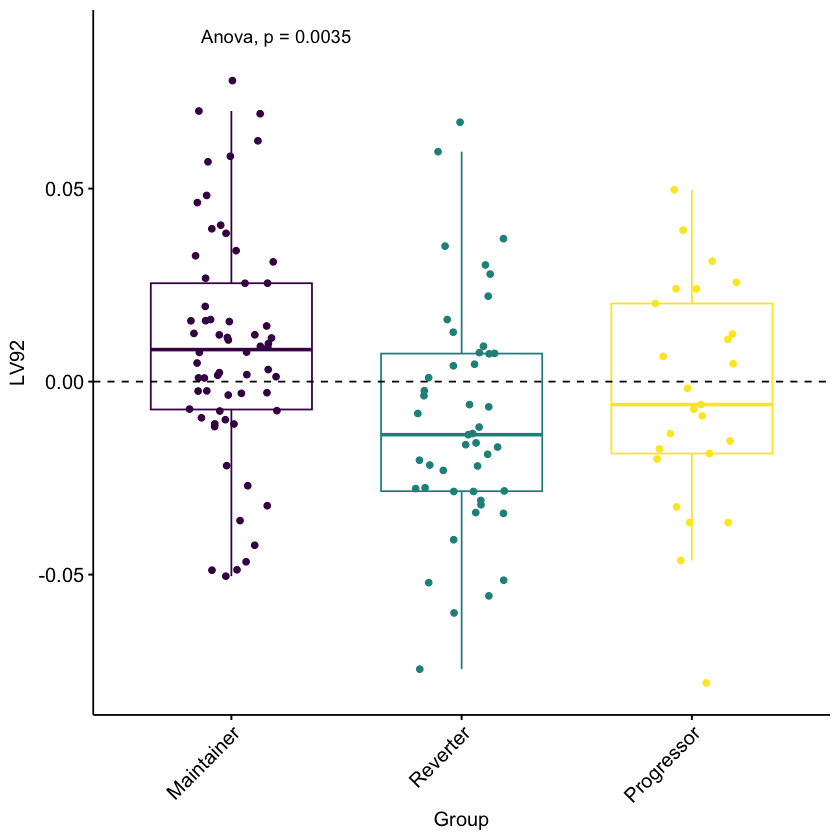

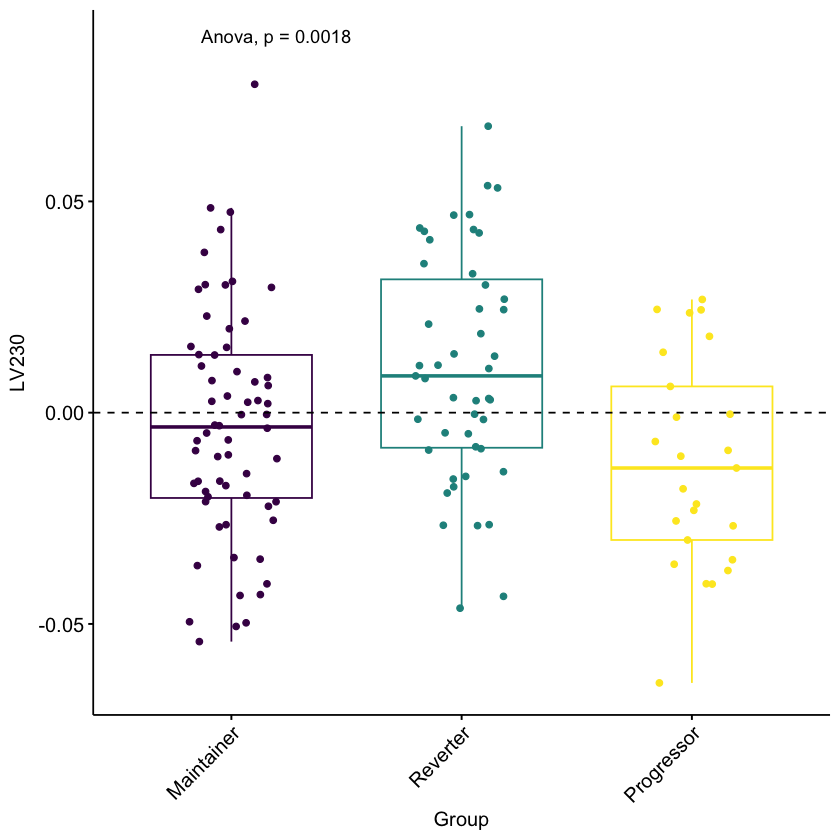

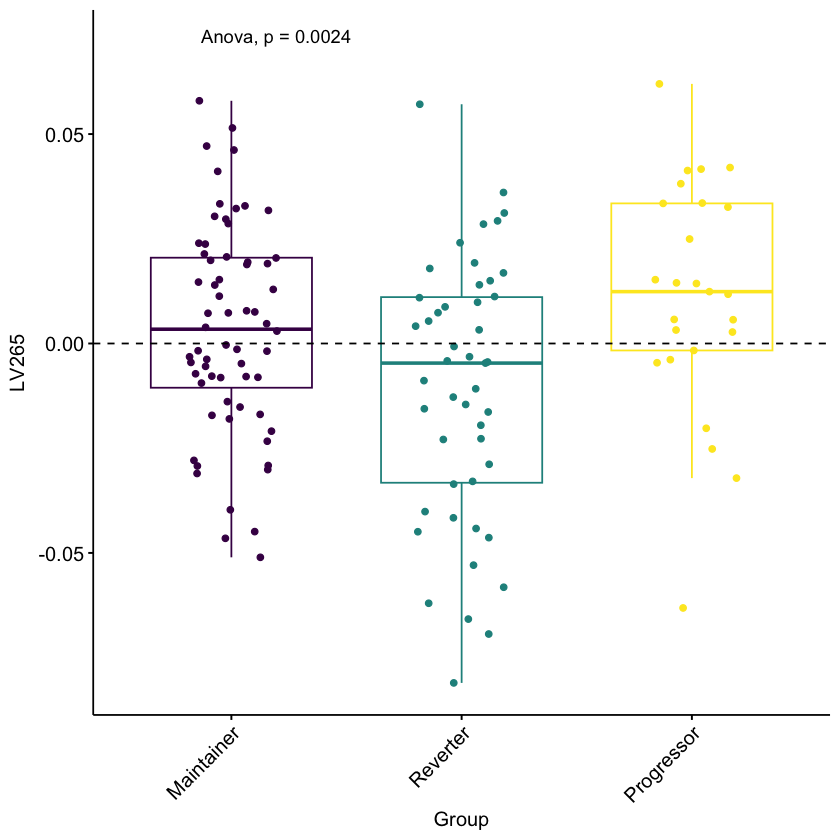

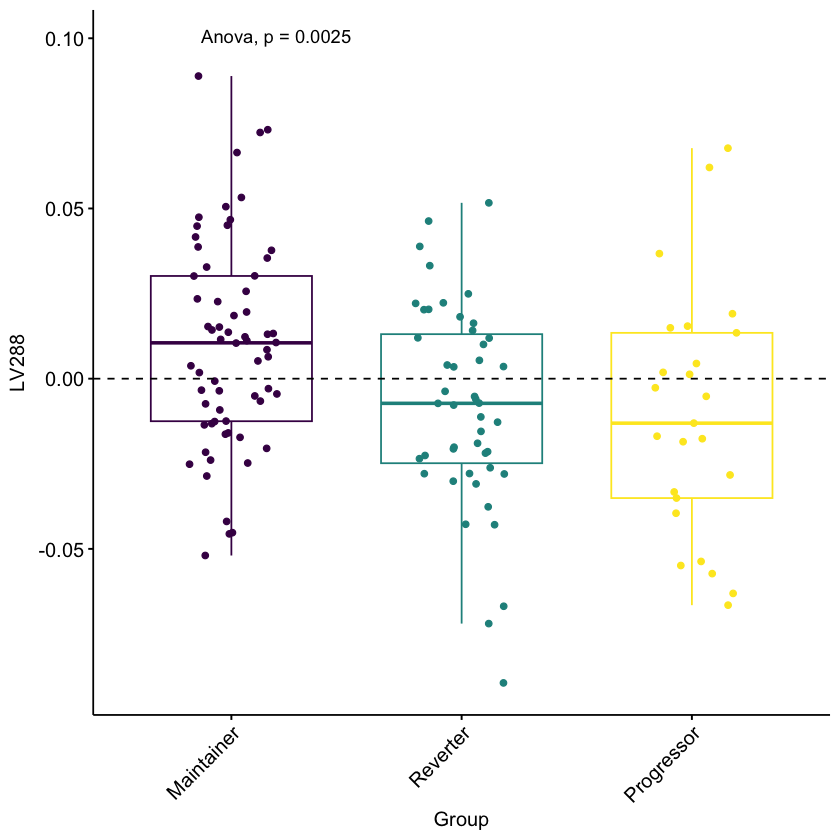

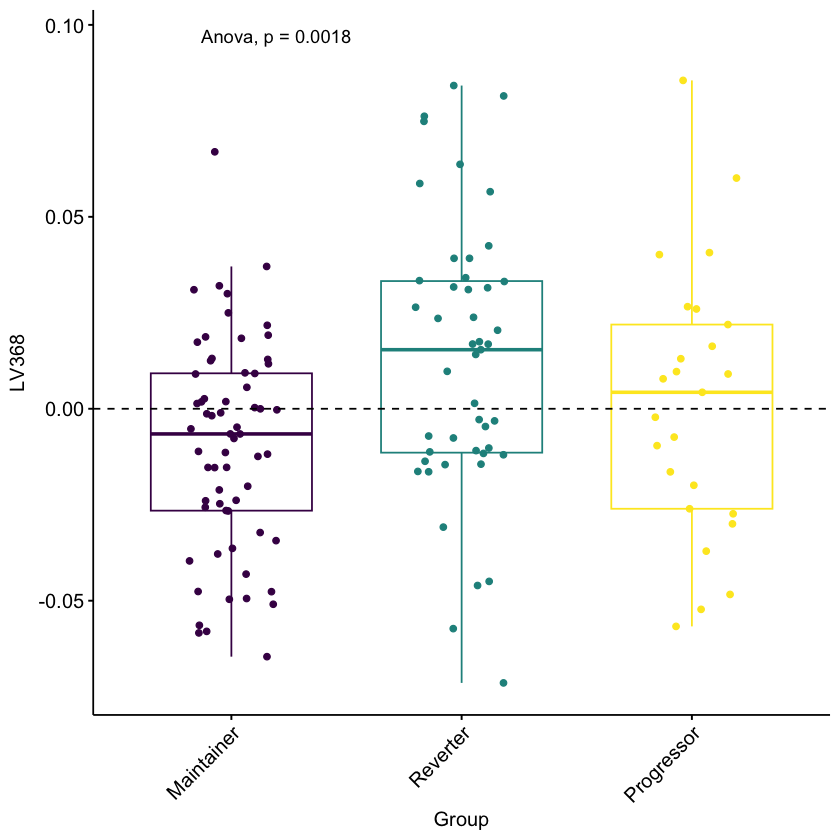

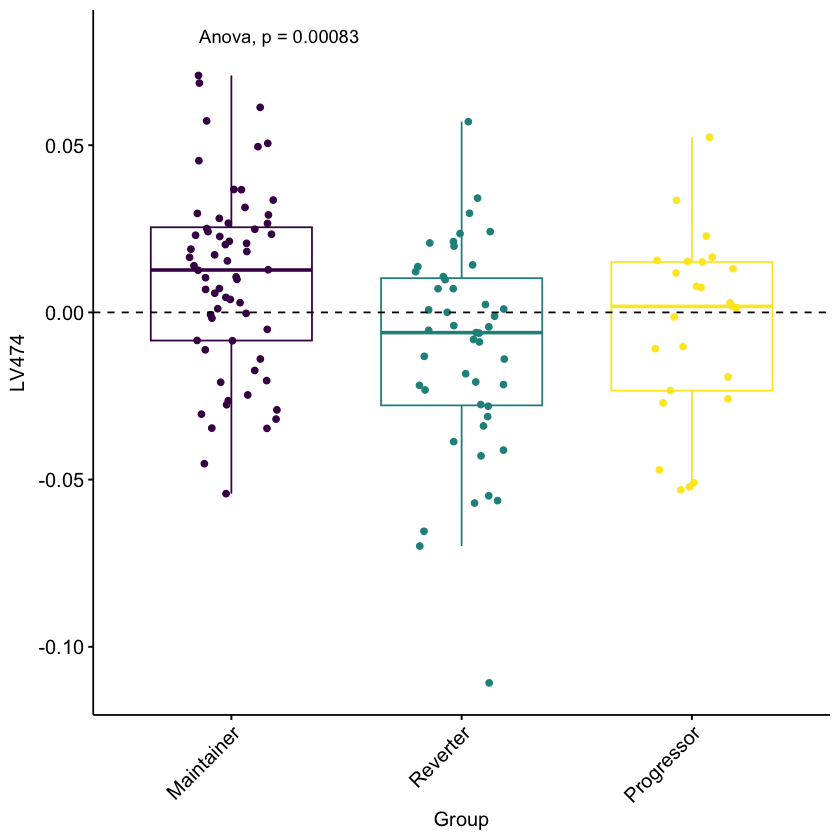

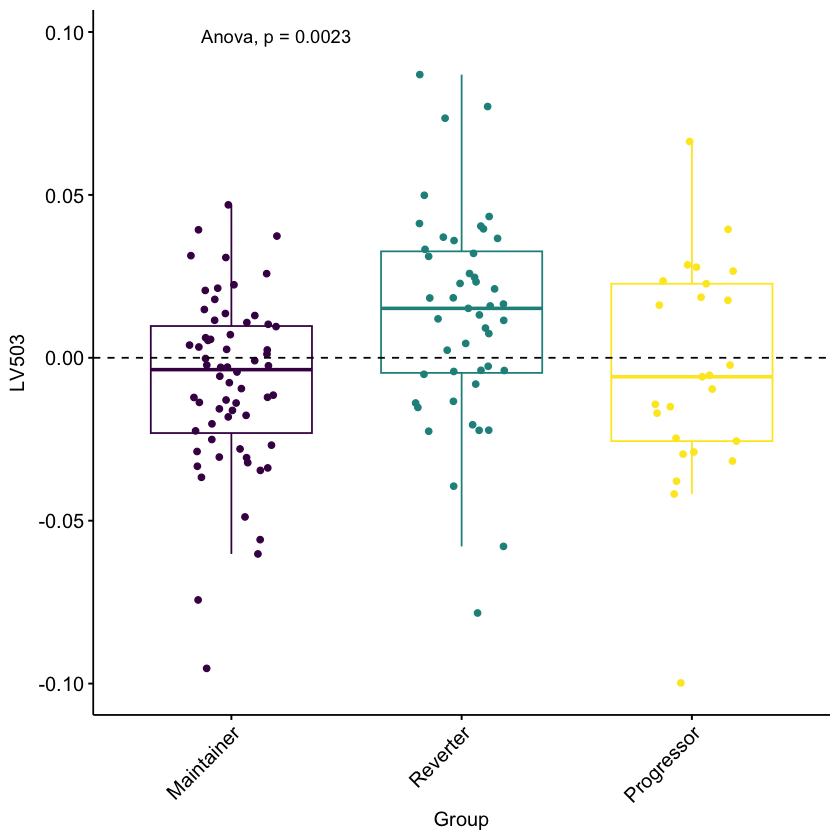

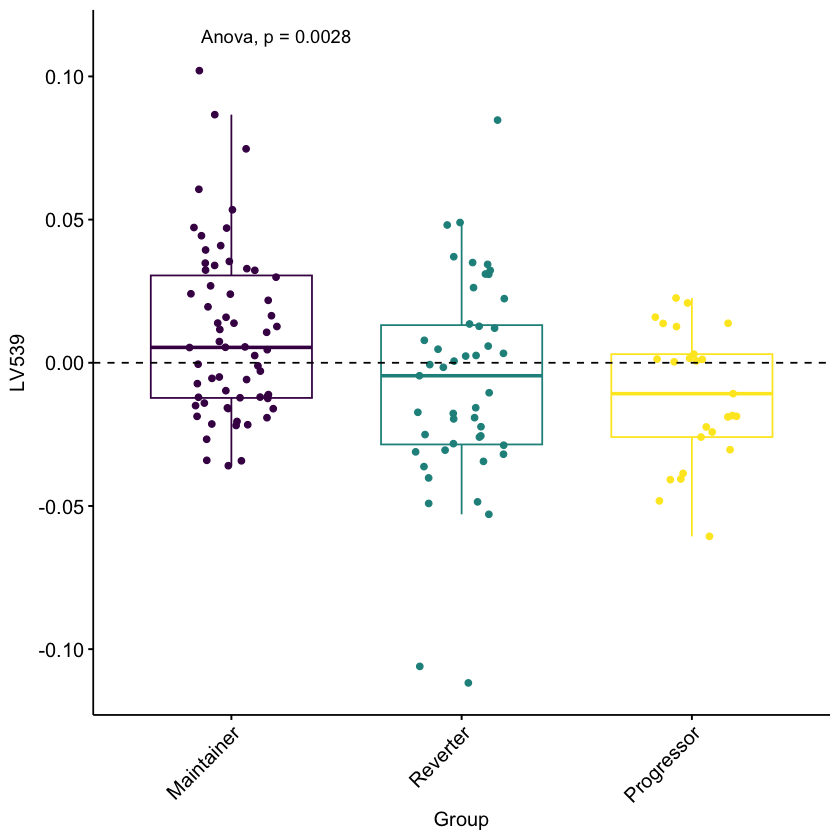

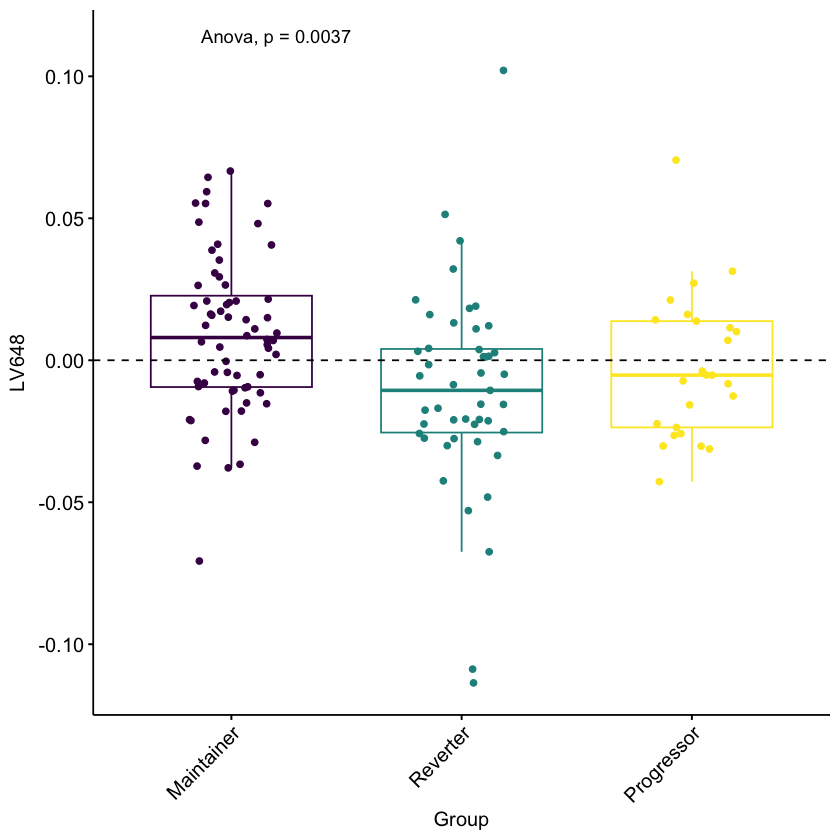

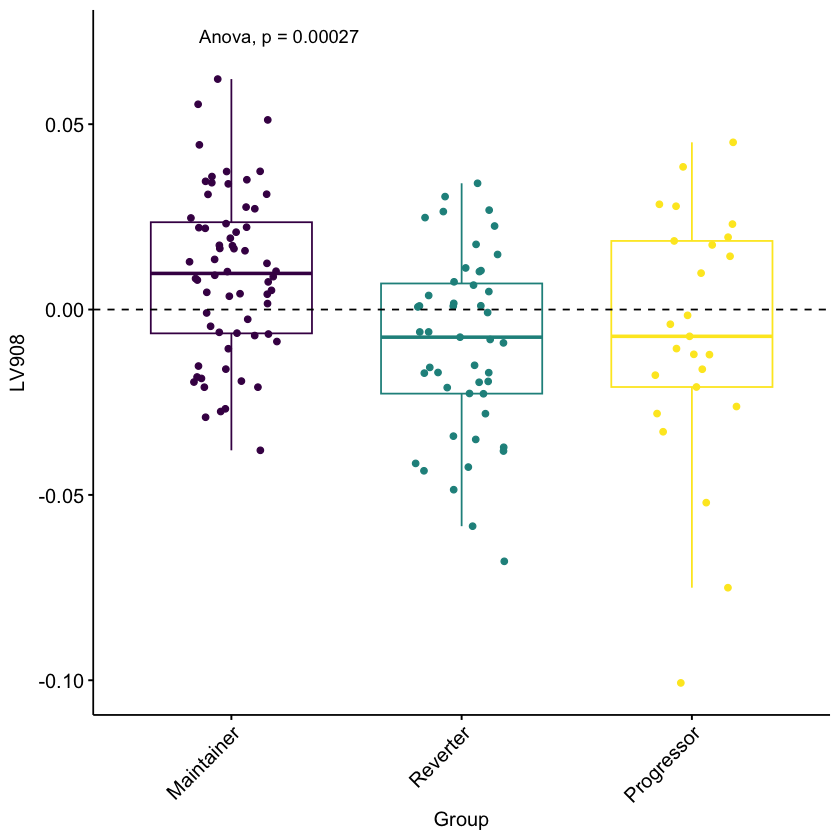

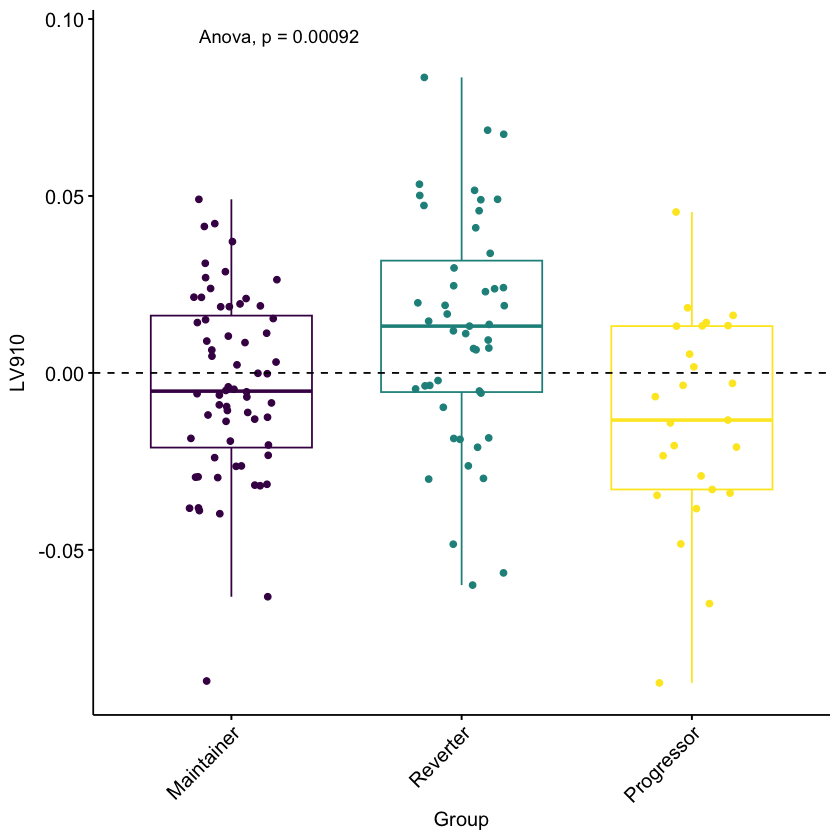

In [14]:
for (i in 1:length(LV_sig_names_2)){
    plot_i <- ggboxplot(DAISY_diff_proj, x = "Group", y = LV_sig_names_2[i], color = "Group", 
          add = "jitter", legend = "none") +
  rotate_x_text(angle = 45)+
  geom_hline(yintercept = mean(DAISY_LV_diff[,LV_sig_names_2[i]]), linetype = 2)+ # Add horizontal line at base mean
  stat_compare_means(method = "anova", label.y = max(DAISY_diff_proj[,LV_sig_names_2[i]])+ 0.01)       # Add global annova p-value 
    print(plot_i)
    
    #ggsave(paste0("LV_",T1D_LV[i],"_visit_",tp,".png"),path = paste0("figures/visit_",tp))
    } 
    #dev.off()